# Assignment Objectives

In [37]:
#Using Randomely selected (min) 500 unique cities based on
#Latitude and Longitude
#Perform a weather check on each city using successive API Calls
#Include a print log of each city as it's being processed
#With City Number, City Name, Requested URL
#Save Both a CSV of all data retrieved and png images
#For each scatter plot
#Use Matplotlib and Seaborn Libraries
#Include 3 observable trends
#Proper plot labels (Plot Titles with Analysis dates)
#Axes lables
#Exported markdown README.md
#Build a series of scatter plots
#Temp(F) v. Latitude
#Humidity (%) v. Latitude
#Cloudiness (%) v. Latitude
#Wind Speed (mph) v. Latitude

# Observable Trends

### 1. Temperatures were largely in a close gap between -40 and 40 (even nearly straight from -20 to 20), but wildly drop off and differ once latitude range exceeded 40.
### 2. Unlike temperature, humidty was more constant throughout the range, but within each range of latitude you have a wild variety of humidty scores.  
### The largest variance were the cities closest to 0 (probably because tropical regions often have daily precipatation patters,  affecting humidity levels throughout the day).
### 3. Coudiness levels seem to be largely unaffected by latitude range as all levels of the latitude spectrum share the same range of cloudiness %.
### 4. Wind speed is similar to cloudiness as most of the latitude ranges have similar wind speeds, with the exception of outliers in the lowest and (near) ranges of the latitude levels.

In [62]:
#Dependencies
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from setuptools import setup, find_packages
import openweathermapy.core as owm
from pprint import pprint
from citipy import citipy
#config
from config import api_key

In [63]:
api_key = "ced591a0bdc05d5c5dd11a19f5177217"
url = "http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217"
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217


# Create a List for Coordinates and Cities

In [64]:
# Create an open list for coordinates and cities
lat_lng = []
cities = []

#Random Data Points
lat = np.random.uniform(low=-90, high=90, size=2500)
lng = np.random.uniform(low=-180, high=180, size=2500)
# lat_lng = zip(lat,lng)
# data = owm.find_cities_by_geo_coord(lat_lng, 2000)
# #Identify nearist city for each lat,lng combo
# city = citipy.nearest_city(lat[0],lng[0]).city_name
# #If city is unique, add to city list
# if city not in cities:
#     cities.append(city)
# lat = np.random.rand(500)*np.random.choice([90,-90])
# lng = np.random.rand(500)*np.random.choice([180,-180])
# coord = zip(lat, lng)
# location = coord
# data = owm.find_cities_by_geo_coord(location, 500)
# # def main():
for i in range(0, len(lat)):
    lat_lng.append((lat[i], lng[i]))
    
for coordinate_pair in lat_lng:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
# owm.BASE_URL

#Create a base DataFrame of Cities
cities_DF = pd.DataFrame(cities)
cities_DF["City Name"]= ""
cities_DF["Country Code"] = ""
cities_DF.head()

,0,City Name,Country Code
0,<citipy.citipy.City object at 0x0000020308362F28>,,
1,<citipy.citipy.City object at 0x0000020308583470>,,
2,<citipy.citipy.City object at 0x0000020308D7EF60>,,
3,<citipy.citipy.City object at 0x0000020308D7EF60>,,
4,<citipy.citipy.City object at 0x0000020308583DA0>,,


In [65]:
print(lat_lng[0])
print(cities[0])

(-6.3690730989894604, 83.885645487979161)


In [66]:
#Create a Dataframe displaying Coordinates
coordinates_df = pd.DataFrame({"Lat": lat,
                              "Lon": lng})
coordinates_df.head()

,Lat,Lon
0,88.988981,83.885645
1,88.988981,-157.341597
2,88.988981,-169.643655
3,88.988981,-169.779530
4,88.988981,-142.660176


In [67]:
coord_df = coordinates_df
coord_df.head()

,Lat,Lon
0,88.988981,83.885645
1,88.988981,-157.341597
2,88.988981,-169.643655
3,88.988981,-169.779530
4,88.988981,-142.660176


In [68]:
cities

 ...]

In [69]:
#Create a Dataframe including:
#Temp(F)
#Humidity (%)
#Cloudiness (%)
#Wind Speed (mph)
coord_df["City Name"] = ""
coord_df["Country"] = ""
coord_df["Temperature (F)"] = ""
coord_df["Humidity (%)"]= ""
coord_df["Cloudiness (%)"] = ""
coord_df["Wind Speed (mph)"] = ""
coord_df.head()

,Lat,Lon,City Name,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,88.988981,83.885645,,,,,,
1,88.988981,-157.341597,,,,,,
2,88.988981,-169.643655,,,,,,
3,88.988981,-169.779530,,,,,,
4,88.988981,-142.660176,,,,,,


In [70]:
#Find City Name and Country Code using Pandas iLoc
for index, row in cities_DF.iterrows():
    row["City Name"] = cities_DF.iloc[index,0].city_name
    row["Country Code"] = cities_DF.iloc[index,0].country_code
print(cities_DF)
#Use only uniques, eliminate duplicates
cities_DF.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_DF.reset_index(inplace=True)
#Delete unused columns
del cities_DF[0]
del cities_DF['index']

cities_df.head()

                                                      0         City Name  \
0     <citipy.citipy.City object at 0x0000020308362F28>         hithadhoo   
1     <citipy.citipy.City object at 0x0000020308583470>            faanui   
2     <citipy.citipy.City object at 0x0000020308D7EF60>             vaini   
3     <citipy.citipy.City object at 0x0000020308D7EF60>             vaini   
4     <citipy.citipy.City object at 0x0000020308583DA0>           mataura   
5     <citipy.citipy.City object at 0x0000020308585710>           rikitea   
6     <citipy.citipy.City object at 0x000002030885D048>           peniche   
7     <citipy.citipy.City object at 0x000002030924A668>         dien bien   
8     <citipy.citipy.City object at 0x0000020307C3FD30>          mandiana   
9     <citipy.citipy.City object at 0x0000020307AE75C0>        ponferrada   
10    <citipy.citipy.City object at 0x00000203074F9630>            hobart   
11    <citipy.citipy.City object at 0x0000020308C73208>          udachnyy   

NameError: name 'cities_df' is not defined

In [71]:
cities_DF.head()

,City Name,Country Code
0,hithadhoo,mv
1,faanui,pf
2,vaini,to
3,mataura,pf
4,rikitea,pf


In [72]:
#Append cities_DF to include coord_df
cities_DF["Latitude"] = ""
cities_DF["Longitude"] = ""
cities_DF["Temperature (F)"] = ""
cities_DF["Humidity (%)"] = ""
cities_DF["Cloudiness (%)"] = ""
cities_DF["Wind Speed (mph)"] = ""
cities_DF.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hithadhoo,mv,,,,,,
1,faanui,pf,,,,,,
2,vaini,to,,,,,,
3,mataura,pf,,,,,,
4,rikitea,pf,,,,,,


In [73]:
#Create a dictionary of information needed/intested in
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
query_url = f"{url}appid={api_key}&units={units}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&units=imperial


In [103]:
api_key

In [ ]:
# #Get Weather Data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# print(json.dumps(weather_json, sort_keys=True, indent=4))
# #Pretty Print File
# # pprint(weather_json)
# print(url)

In [ ]:
# #try geting current weather
# current_weather = owm.get_current("Paris",**settings)
# # pprint(f"{current_weather}")
# pprint(current_weather)

# Data Retrieval

In [ ]:
# cities_DF = pd.DataFrame({"Latitude":  "",
#              "Longitude": "",
#              "Temperature (F)": "",
#              "Humidity (%)": "",
#              "Cloudiness (%)": "",
#              "Wind Speed (MPH)": ""})
# print(cities_DF)

In [77]:
#Start with a Dataframe to later be appended

#Building cities_DF Dataframe
print("Begin Data Retrieval")
print("--------------------------")

for index, row in cities_DF.iterrows():
    #for index, row in cities_df.iterrows():
#for row in cities_df:
#.items
    #to test print row and two of the series from that row:
    print(index, row, row['City Name'], row['Country Code']) 
    print("Processing Record " + str(index) + " of Set 1 | " + str(row['City Name']))
     #url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], api_key)
#     params = {
#         "key": api_key
#     }
    url = "http://api.openweathermap.org/data/2.5/weather?appid=%s&q=%s&units=imperial" % (api_key, row['City Name'])
    print(url)
    weather_data = requests.get(url)
    #.json() above
    print(weather_data.url)
    weather_data = weather_data.json()
    #Append
    try:
        lati = weather_data['coord']['lat']
        long = weather_data['coord']['lon']
        temper = weather_data['main']['temp']
        humi = weather_data['main']['humidity']
        cloud = weather_data['clouds']['all']
        wind = weather_data['wind']['speed']
        
        #Reset Values by index, "String Heading", city measurements
        cities_DF.set_value(index, "Latitude", lati)
        cities_DF.set_value(index, "Longitude", long)
        cities_DF.set_value(index, "Temperature (F)", temper)
        cities_DF.set_value(index, "Humidity (%)", humi)
        cities_DF.set_value(index, "Cloudiness (%)", cloud)
        cities_DF.set_value(index, "Wind Speed (mph)", wind)

        #Append city_DF
        cities_DF.append({"Latitude": lati,
                         "Longitude": long,
                         "Temperature (F)": temper,
                         "Humidity (%)": humi,
                         "Cloudiness (%)": cloud,
                         "Wind Speed (mph)": wind})

    except:
        print("Error")
        continue
    
    
    #use exception handling in case the city doesn't match
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Begin Data Retrieval
--------------------------
0 City Name           hithadhoo
Country Code               mv
Latitude                 -0.6
Longitude               73.08
Temperature (F)            84
Humidity (%)              100
Cloudiness (%)             56
Wind Speed (mph)         1.97
Name: 0, dtype: object hithadhoo mv
Processing Record 0 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=hithadhoo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=hithadhoo&units=imperial
Error
1 City Name           faanui
Country Code            pf
Latitude            -16.48
Longitude          -151.75
Temperature (F)      82.38
Humidity (%)           100
Cloudiness (%)          68
Wind Speed (mph)     17.18
Name: 1, dtype: object faanui pf
Processing Record 1 of Set 1 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=faanui&units=imperial
ht

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=atuona&units=imperial
Error
19 City Name           bukachacha
Country Code                ru
Latitude                 52.99
Longitude               116.91
Temperature (F)          31.53
Humidity (%)                63
Cloudiness (%)              92
Wind Speed (mph)          5.21
Name: 19, dtype: object bukachacha ru
Processing Record 19 of Set 1 | bukachacha
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=bukachacha&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=bukachacha&units=imperial
Error
20 City Name           mys shmidta
Country Code                 ru
Latitude                       
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (mph)               
Name: 20, dtype: object mys shmidta ru
Processing Record 20

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=bitung&units=imperial
Error
34 City Name           saint-philippe
Country Code                    re
Latitude                     45.36
Longitude                   -73.48
Temperature (F)              32.45
Humidity (%)                    80
Cloudiness (%)                   1
Wind Speed (mph)               4.7
Name: 34, dtype: object saint-philippe re
Processing Record 34 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=saint-philippe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=saint-philippe&units=imperial
Error
35 City Name           vammala
Country Code             fi
Latitude              61.34
Longitude             22.91
Temperature (F)        8.82
Humidity (%)             84
Cloudiness (%)            0
Wind Speed (mph)       1.12
Name: 35, dtype: object vammala fi
Processi

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=avarua&units=imperial
Error
51 City Name           quepos
Country Code            cr
Latitude              9.43
Longitude           -84.16
Temperature (F)      72.55
Humidity (%)            56
Cloudiness (%)          20
Wind Speed (mph)     18.34
Name: 51, dtype: object quepos cr
Processing Record 51 of Set 1 | quepos
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=quepos&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=quepos&units=imperial
Error
52 City Name           arraial do cabo
Country Code                     br
Latitude                     -22.97
Longitude                    -42.02
Temperature (F)               78.56
Humidity (%)                     86
Cloudiness (%)                   32
Wind Speed (mph)              19.08
Name: 52, dtype: object arraial do cabo br
Processing Record 52 of Set 1 | 

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=geraldton&units=imperial
Error
68 City Name           talnakh
Country Code             ru
Latitude              69.49
Longitude             88.39
Temperature (F)       -6.23
Humidity (%)             70
Cloudiness (%)           68
Wind Speed (mph)       6.44
Name: 68, dtype: object talnakh ru
Processing Record 68 of Set 1 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=talnakh&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=talnakh&units=imperial
Error
69 City Name            buin
Country Code           pg
Latitude           -33.73
Longitude          -70.74
Temperature (F)        68
Humidity (%)           37
Cloudiness (%)          0
Wind Speed (mph)     6.93
Name: 69, dtype: object buin pg
Processing Record 69 of Set 1 | buin
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5d

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=vila%20velha&units=imperial
Error
85 City Name           muros
Country Code           es
Latitude            42.77
Longitude           -9.06
Temperature (F)      48.2
Humidity (%)          100
Cloudiness (%)         90
Wind Speed (mph)     3.36
Name: 85, dtype: object muros es
Processing Record 85 of Set 1 | muros
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=muros&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=muros&units=imperial
Error
86 City Name           olinda
Country Code            br
Latitude             -2.03
Longitude           -79.75
Temperature (F)       82.4
Humidity (%)            69
Cloudiness (%)          75
Wind Speed (mph)      6.93
Name: 86, dtype: object olinda br
Processing Record 86 of Set 1 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f51

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=yellowknife&units=imperial
Error
101 City Name           haibowan
Country Code              cn
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 101, dtype: object haibowan cn
Processing Record 101 of Set 1 | haibowan
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=haibowan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=haibowan&units=imperial
Error
102 City Name           saldanha
Country Code              za
Latitude               41.42
Longitude              -6.55
Temperature (F)        40.58
Humidity (%)              90
Cloudiness (%)             0
Wind Speed (mph)        5.21
Name: 102, dtype: object saldanha za
Processing Record 102 of Set 1 | saldanha
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=cayenne&units=imperial
Error
118 City Name           tazovskiy
Country Code               ru
Latitude                67.47
Longitude                78.7
Temperature (F)          9.71
Humidity (%)               81
Cloudiness (%)             80
Wind Speed (mph)        13.71
Name: 118, dtype: object tazovskiy ru
Processing Record 118 of Set 1 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=tazovskiy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=tazovskiy&units=imperial
Error
119 City Name           skerries
Country Code              ie
Latitude               53.58
Longitude              -6.11
Temperature (F)        48.29
Humidity (%)              93
Cloudiness (%)            75
Wind Speed (mph)        9.17
Name: 119, dtype: object skerries ie
Processing Record 119 of Set 1 | skerries
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=carnarvon&units=imperial
Error
135 City Name           saint-francois
Country Code                    gp
Latitude                     46.42
Longitude                     3.91
Temperature (F)               44.6
Humidity (%)                    81
Cloudiness (%)                  24
Wind Speed (mph)              4.32
Name: 135, dtype: object saint-francois gp
Processing Record 135 of Set 1 | saint-francois
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=saint-francois&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=saint-francois&units=imperial
Error
136 City Name           taolanaro
Country Code               mg
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 136, dtype: ob

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=sentyabrskiy&units=imperial
Error
151 City Name            kieta
Country Code            pg
Latitude             -6.22
Longitude           155.63
Temperature (F)      80.85
Humidity (%)           100
Cloudiness (%)          80
Wind Speed (mph)      4.09
Name: 151, dtype: object kieta pg
Processing Record 151 of Set 1 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=kieta&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=kieta&units=imperial
Error
152 City Name           livani
Country Code            lv
Latitude             56.35
Longitude            26.18
Temperature (F)      19.92
Humidity (%)            66
Cloudiness (%)           0
Wind Speed (mph)     12.15
Name: 152, dtype: object livani lv
Processing Record 152 of Set 1 | livani
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=inzer&units=imperial
Error
166 City Name            hofn
Country Code           is
Latitude            64.25
Longitude          -15.21
Temperature (F)      40.4
Humidity (%)           97
Cloudiness (%)         88
Wind Speed (mph)    26.57
Name: 166, dtype: object hofn is
Processing Record 166 of Set 1 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=hofn&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=hofn&units=imperial
Error
167 City Name           isla mujeres
Country Code                  mx
Latitude                   21.23
Longitude                 -86.73
Temperature (F)             78.8
Humidity (%)                  65
Cloudiness (%)                20
Wind Speed (mph)            9.17
Name: 167, dtype: object isla mujeres mx
Processing Record 167 of Set 1 | isla mujeres
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=urumqi&units=imperial
Error
185 City Name           armidale
Country Code              au
Latitude              -30.51
Longitude             151.67
Temperature (F)        64.79
Humidity (%)              78
Cloudiness (%)             8
Wind Speed (mph)        9.24
Name: 185, dtype: object armidale au
Processing Record 185 of Set 1 | armidale
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=armidale&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=armidale&units=imperial
Error
186 City Name           cartagena
Country Code               co
Latitude                37.63
Longitude                  -1
Temperature (F)         54.66
Humidity (%)               41
Cloudiness (%)              0
Wind Speed (mph)        10.58
Name: 186, dtype: object cartagena co
Processing Record 186 of Set 1 | cartagena
http://api.ope

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=luganville&units=imperial
Error
201 City Name           morondava
Country Code               mg
Latitude                -20.3
Longitude               44.28
Temperature (F)         81.89
Humidity (%)               87
Cloudiness (%)              0
Wind Speed (mph)            7
Name: 201, dtype: object morondava mg
Processing Record 201 of Set 1 | morondava
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=morondava&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=morondava&units=imperial
Error
202 City Name           mairana
Country Code             bo
Latitude             -18.12
Longitude            -63.96
Temperature (F)       54.57
Humidity (%)             92
Cloudiness (%)            0
Wind Speed (mph)       2.19
Name: 202, dtype: object mairana bo
Processing Record 202 of Set 1 | mairana
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=chernyshevskiy&units=imperial
Error
217 City Name           lundazi
Country Code             zm
Latitude             -12.29
Longitude             33.17
Temperature (F)        66.9
Humidity (%)             92
Cloudiness (%)           24
Wind Speed (mph)        7.9
Name: 217, dtype: object lundazi zm
Processing Record 217 of Set 1 | lundazi
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=lundazi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=lundazi&units=imperial
Error
218 City Name           hualmay
Country Code             pe
Latitude              -11.1
Longitude            -77.61
Temperature (F)       69.87
Humidity (%)             76
Cloudiness (%)           32
Wind Speed (mph)       3.98
Name: 218, dtype: object hualmay pe
Processing Record 218 of Set 1 | hualmay
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=los%20llanos%20de%20aridane&units=imperial
Error
234 City Name           vavuniya
Country Code              lk
Latitude                8.76
Longitude               80.5
Temperature (F)        77.07
Humidity (%)              92
Cloudiness (%)            24
Wind Speed (mph)        2.98
Name: 234, dtype: object vavuniya lk
Processing Record 234 of Set 1 | vavuniya
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=vavuniya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=vavuniya&units=imperial
Error
235 City Name           half moon bay
Country Code                   us
Latitude                    37.46
Longitude                 -122.43
Temperature (F)             62.67
Humidity (%)                   66
Cloudiness (%)                  1
Wind Speed (mph)            18.34
Name: 235, dtype: object half moon bay us


http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=sorong&units=imperial
Error
250 City Name           bargal
Country Code            so
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 250, dtype: object bargal so
Processing Record 250 of Set 1 | bargal
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=bargal&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=bargal&units=imperial
Error
251 City Name           grand centre
Country Code                  ca
Latitude                        
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (mph)                
Name: 251, dtype: object grand centre ca
Processing Record 251 of Set 1 | grand centre
http://a

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=miyako&units=imperial
Error
266 City Name           mount isa
Country Code               au
Latitude               -20.73
Longitude              139.49
Temperature (F)          82.4
Humidity (%)               54
Cloudiness (%)              0
Wind Speed (mph)        12.75
Name: 266, dtype: object mount isa au
Processing Record 266 of Set 1 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mount isa&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mount%20isa&units=imperial
Error
267 City Name            doha
Country Code           kw
Latitude            25.29
Longitude           51.53
Temperature (F)        77
Humidity (%)           41
Cloudiness (%)          0
Wind Speed (mph)      4.7
Name: 267, dtype: object doha kw
Processing Record 267 of Set 1 | doha
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=kavieng&units=imperial
Error
283 City Name           madingou
Country Code              cg
Latitude               -4.17
Longitude              13.56
Temperature (F)        73.79
Humidity (%)              94
Cloudiness (%)            20
Wind Speed (mph)        2.64
Name: 283, dtype: object madingou cg
Processing Record 283 of Set 1 | madingou
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=madingou&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=madingou&units=imperial
Error
284 City Name           pisco
Country Code           pe
Latitude           -13.71
Longitude           -76.2
Temperature (F)     72.35
Humidity (%)           73
Cloudiness (%)         12
Wind Speed (mph)     1.97
Name: 284, dtype: object pisco pe
Processing Record 284 of Set 1 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=

Error
301 City Name           mudhol
Country Code            in
Latitude             16.33
Longitude            75.29
Temperature (F)      72.57
Humidity (%)            48
Cloudiness (%)          56
Wind Speed (mph)      0.96
Name: 301, dtype: object mudhol in
Processing Record 301 of Set 1 | mudhol
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mudhol&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mudhol&units=imperial
Error
302 City Name           snezhnogorsk
Country Code                  ru
Latitude                   69.19
Longitude                  33.23
Temperature (F)             15.8
Humidity (%)                  78
Cloudiness (%)                75
Wind Speed (mph)            8.95
Name: 302, dtype: object snezhnogorsk ru
Processing Record 302 of Set 1 | snezhnogorsk
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=snezhnogorsk&units=imperial
ht

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=guerrero%20negro&units=imperial
Error
319 City Name           of
Country Code        tr
Latitude              
Longitude             
Temperature (F)       
Humidity (%)          
Cloudiness (%)        
Wind Speed (mph)      
Name: 319, dtype: object of tr
Processing Record 319 of Set 1 | of
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=of&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=of&units=imperial
Error
320 City Name           rungata
Country Code             ki
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 320, dtype: object rungata ki
Processing Record 320 of Set 1 | rungata
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rungata&

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=taoudenni&units=imperial
Error
338 City Name           dryden
Country Code            ca
Latitude             49.79
Longitude           -92.84
Temperature (F)         32
Humidity (%)            86
Cloudiness (%)          90
Wind Speed (mph)     11.41
Name: 338, dtype: object dryden ca
Processing Record 338 of Set 1 | dryden
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=dryden&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=dryden&units=imperial
Error
339 City Name            nome
Country Code           us
Latitude            30.04
Longitude          -94.42
Temperature (F)     74.73
Humidity (%)           78
Cloudiness (%)         90
Wind Speed (mph)     9.17
Name: 339, dtype: object nome us
Processing Record 339 of Set 1 | nome
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=kaeo&units=imperial
Error
355 City Name           winslow
Country Code             us
Latitude              51.94
Longitude             -0.88
Temperature (F)        44.6
Humidity (%)             70
Cloudiness (%)           92
Wind Speed (mph)       5.82
Name: 355, dtype: object winslow us
Processing Record 355 of Set 1 | winslow
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=winslow&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=winslow&units=imperial
Error
356 City Name            jambi
Country Code            id
Latitude              -1.6
Longitude           103.62
Temperature (F)      73.43
Humidity (%)            93
Cloudiness (%)          92
Wind Speed (mph)      6.55
Name: 356, dtype: object jambi id
Processing Record 356 of Set 1 | jambi
http://api.openweathermap.org/data/2.5/weather?appid=ced591a

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=venado&units=imperial
Error
373 City Name           omboue
Country Code            ga
Latitude             -1.57
Longitude             9.26
Temperature (F)      81.98
Humidity (%)           100
Cloudiness (%)          32
Wind Speed (mph)      9.24
Name: 373, dtype: object omboue ga
Processing Record 373 of Set 1 | omboue
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=omboue&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=omboue&units=imperial
Error
374 City Name           sept-iles
Country Code               ca
Latitude                 50.2
Longitude              -66.38
Temperature (F)          21.2
Humidity (%)               79
Cloudiness (%)             40
Wind Speed (mph)         2.24
Name: 374, dtype: object sept-iles ca
Processing Record 374 of Set 1 | sept-iles
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=cherskiy&units=imperial
Error
393 City Name           karakol
Country Code             kg
Latitude              42.49
Longitude             78.39
Temperature (F)       30.72
Humidity (%)            100
Cloudiness (%)           92
Wind Speed (mph)       3.09
Name: 393, dtype: object karakol kg
Processing Record 393 of Set 1 | karakol
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=karakol&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=karakol&units=imperial
Error
394 City Name           nishihara
Country Code               jp
Latitude                35.74
Longitude              139.53
Temperature (F)         60.35
Humidity (%)               41
Cloudiness (%)             40
Wind Speed (mph)         5.82
Name: 394, dtype: object nishihara jp
Processing Record 394 of Set 1 | nishihara
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=portland&units=imperial
Error
409 City Name           chute-aux-outardes
Country Code                        ca
Latitude                         49.12
Longitude                       -68.38
Temperature (F)                  25.05
Humidity (%)                        73
Cloudiness (%)                       1
Wind Speed (mph)                  2.64
Name: 409, dtype: object chute-aux-outardes ca
Processing Record 409 of Set 1 | chute-aux-outardes
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=chute-aux-outardes&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=chute-aux-outardes&units=imperial
Error
410 City Name           la tuque
Country Code              ca
Latitude               47.44
Longitude             -72.79
Temperature (F)         28.7
Humidity (%)              61
Cloudiness (%)             0
Wind Speed

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=high%20level&units=imperial
Error
424 City Name            mega
Country Code           et
Latitude             4.06
Longitude           38.32
Temperature (F)     62.99
Humidity (%)           82
Cloudiness (%)          0
Wind Speed (mph)     9.46
Name: 424, dtype: object mega et
Processing Record 424 of Set 1 | mega
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mega&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mega&units=imperial
Error
425 City Name           nemuro
Country Code            jp
Latitude             43.32
Longitude           145.57
Temperature (F)       39.2
Humidity (%)            69
Cloudiness (%)          20
Wind Speed (mph)     10.29
Name: 425, dtype: object nemuro jp
Processing Record 425 of Set 1 | nemuro
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f

Name: 439, dtype: object mulege mx
Processing Record 439 of Set 1 | mulege
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mulege&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mulege&units=imperial
Error
440 City Name           kabanjahe
Country Code               id
Latitude                  3.1
Longitude               98.49
Temperature (F)         62.36
Humidity (%)               99
Cloudiness (%)             68
Wind Speed (mph)         1.97
Name: 440, dtype: object kabanjahe id
Processing Record 440 of Set 1 | kabanjahe
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=kabanjahe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=kabanjahe&units=imperial
Error
441 City Name           bandarbeyla
Country Code                 so
Latitude                   9.49
Longitude                 50.81
Temperatur

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=mirnyy&units=imperial
Error
457 City Name           hambantota
Country Code                lk
Latitude                  6.12
Longitude                81.12
Temperature (F)          79.64
Humidity (%)               100
Cloudiness (%)              88
Wind Speed (mph)          7.67
Name: 457, dtype: object hambantota lk
Processing Record 457 of Set 1 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=hambantota&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=hambantota&units=imperial
Error
458 City Name           narayanganj
Country Code                 bd
Latitude                  23.62
Longitude                  90.5
Temperature (F)            73.4
Humidity (%)                 83
Cloudiness (%)               40
Wind Speed (mph)           8.05
Name: 458, dtype: object narayanganj bd
Processing Reco

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=marzuq&units=imperial
Error
472 City Name           rockhampton
Country Code                 au
Latitude                 -23.38
Longitude                150.51
Temperature (F)            82.4
Humidity (%)                 74
Cloudiness (%)               75
Wind Speed (mph)           5.82
Name: 472, dtype: object rockhampton au
Processing Record 472 of Set 1 | rockhampton
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rockhampton&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rockhampton&units=imperial
Error
473 City Name           sidi ali
Country Code              dz
Latitude                36.1
Longitude               0.42
Temperature (F)        47.46
Humidity (%)              81
Cloudiness (%)            68
Wind Speed (mph)        6.67
Name: 473, dtype: object sidi ali dz
Processing Record 473 of Set 1

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=baranain&units=imperial
Error
491 City Name           bulalacao
Country Code               ph
Latitude                 13.7
Longitude              123.78
Temperature (F)         75.81
Humidity (%)              100
Cloudiness (%)             88
Wind Speed (mph)        12.82
Name: 491, dtype: object bulalacao ph
Processing Record 491 of Set 1 | bulalacao
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=bulalacao&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=bulalacao&units=imperial
Error
492 City Name           kavakli
Country Code             tr
Latitude              41.09
Longitude             28.33
Temperature (F)       50.04
Humidity (%)            100
Cloudiness (%)           75
Wind Speed (mph)       9.17
Name: 492, dtype: object kavakli tr
Processing Record 492 of Set 1 | kavakli
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=luoyang&units=imperial
Error
508 City Name           lorengau
Country Code              pg
Latitude               -2.02
Longitude             147.27
Temperature (F)         83.1
Humidity (%)              98
Cloudiness (%)            44
Wind Speed (mph)        8.46
Name: 508, dtype: object lorengau pg
Processing Record 508 of Set 1 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=lorengau&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=lorengau&units=imperial
Error
509 City Name           luanda
Country Code            ao
Latitude             -8.83
Longitude            13.24
Temperature (F)       80.6
Humidity (%)            88
Cloudiness (%)          75
Wind Speed (mph)      3.36
Name: 509, dtype: object luanda ao
Processing Record 509 of Set 1 | luanda
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=fuerte%20olimpo&units=imperial
Error
524 City Name           semnan
Country Code            ir
Latitude             35.58
Longitude            53.39
Temperature (F)      55.38
Humidity (%)            48
Cloudiness (%)           0
Wind Speed (mph)      5.99
Name: 524, dtype: object semnan ir
Processing Record 524 of Set 1 | semnan
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=semnan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=semnan&units=imperial
Error
525 City Name           makakilo city
Country Code                   us
Latitude                    21.35
Longitude                 -158.09
Temperature (F)             80.62
Humidity (%)                   61
Cloudiness (%)                 20
Wind Speed (mph)            11.41
Name: 525, dtype: object makakilo city us
Processing Record 525 of Set 1 | mak

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=chom%20bung&units=imperial
Error
541 City Name           rocha
Country Code           uy
Latitude           -34.48
Longitude          -54.34
Temperature (F)     55.02
Humidity (%)           71
Cloudiness (%)          0
Wind Speed (mph)     7.34
Name: 541, dtype: object rocha uy
Processing Record 541 of Set 1 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rocha&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rocha&units=imperial
Error
542 City Name           broken hill
Country Code                 au
Latitude                 -31.97
Longitude                141.45
Temperature (F)           65.01
Humidity (%)                 45
Cloudiness (%)                0
Wind Speed (mph)           7.56
Name: 542, dtype: object broken hill au
Processing Record 542 of Set 1 | broken hill
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=karangasem&units=imperial
Error
559 City Name           jaguaruana
Country Code                br
Latitude                 -4.83
Longitude               -37.78
Temperature (F)          73.16
Humidity (%)                98
Cloudiness (%)              88
Wind Speed (mph)          1.63
Name: 559, dtype: object jaguaruana br
Processing Record 559 of Set 1 | jaguaruana
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=jaguaruana&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=jaguaruana&units=imperial
Error
560 City Name           ruteng
Country Code            id
Latitude             -8.61
Longitude           120.46
Temperature (F)      76.08
Humidity (%)            92
Cloudiness (%)          20
Wind Speed (mph)      3.65
Name: 560, dtype: object ruteng id
Processing Record 560 of Set 1 | ruteng
http://api.openw

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=ust-tsilma&units=imperial
Error
577 City Name           maningrida
Country Code                au
Latitude                -12.05
Longitude               134.23
Temperature (F)          81.48
Humidity (%)               100
Cloudiness (%)               0
Wind Speed (mph)          3.87
Name: 577, dtype: object maningrida au
Processing Record 577 of Set 1 | maningrida
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=maningrida&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=maningrida&units=imperial
Error
578 City Name           rapid valley
Country Code                  us
Latitude                   44.06
Longitude                -103.15
Temperature (F)            31.42
Humidity (%)                  86
Cloudiness (%)                90
Wind Speed (mph)           10.29
Name: 578, dtype: object rapid valley us
Pr

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=pasto&units=imperial
Error
592 City Name           khormuj
Country Code             ir
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 592, dtype: object khormuj ir
Processing Record 592 of Set 1 | khormuj
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=khormuj&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=khormuj&units=imperial
Error
593 City Name           narsaq
Country Code            gl
Latitude             60.91
Longitude           -46.05
Temperature (F)         14
Humidity (%)            43
Cloudiness (%)           0
Wind Speed (mph)      6.93
Name: 593, dtype: object narsaq gl
Processing Record 593 of Set 1 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=ced5

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=kasongo-lunda&units=imperial
Error
609 City Name             zeya
Country Code            ru
Latitude             53.74
Longitude           127.27
Temperature (F)      30.36
Humidity (%)            50
Cloudiness (%)           0
Wind Speed (mph)         7
Name: 609, dtype: object zeya ru
Processing Record 609 of Set 1 | zeya
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=zeya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=zeya&units=imperial
Error
610 City Name           husavik
Country Code             is
Latitude              50.56
Longitude            -96.99
Temperature (F)       32.52
Humidity (%)             97
Cloudiness (%)           64
Wind Speed (mph)       5.44
Name: 610, dtype: object husavik is
Processing Record 610 of Set 1 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=ced591

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=henties%20bay&units=imperial
Error
624 City Name           vestbygda
Country Code               no
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 624, dtype: object vestbygda no
Processing Record 624 of Set 1 | vestbygda
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=vestbygda&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=vestbygda&units=imperial
Error
625 City Name           gigmoto
Country Code             ph
Latitude              13.78
Longitude            124.39
Temperature (F)       75.23
Humidity (%)            100
Cloudiness (%)           88
Wind Speed (mph)      13.27
Name: 625, dtype: object gigmoto ph
Processing Record 625 of Set 1 | gigmoto
http://api.open

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=petauke&units=imperial
Error
642 City Name           rawannawi
Country Code               ki
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 642, dtype: object rawannawi ki
Processing Record 642 of Set 1 | rawannawi
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rawannawi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rawannawi&units=imperial
Error
643 City Name           marovoay
Country Code              mg
Latitude              -16.11
Longitude              46.64
Temperature (F)         80.6
Humidity (%)              88
Cloudiness (%)            20
Wind Speed (mph)        3.42
Name: 643, dtype: object marovoay mg
Processing Record 643 of Set 1 | marovoay
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=johnston&units=imperial
Error
659 City Name           cajueiro
Country Code              br
Latitude                -9.4
Longitude             -36.15
Temperature (F)           77
Humidity (%)              88
Cloudiness (%)             0
Wind Speed (mph)         4.7
Name: 659, dtype: object cajueiro br
Processing Record 659 of Set 1 | cajueiro
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=cajueiro&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=cajueiro&units=imperial
Error
660 City Name           verkhoyansk
Country Code                 ru
Latitude                  67.55
Longitude                133.39
Temperature (F)            3.81
Humidity (%)                 68
Cloudiness (%)               20
Wind Speed (mph)           2.19
Name: 660, dtype: object verkhoyansk ru
Processing Record 660 of Set 1 | verk

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=tsihombe&units=imperial
Error
677 City Name           sobral
Country Code            br
Latitude             -3.69
Longitude           -40.35
Temperature (F)      74.01
Humidity (%)            96
Cloudiness (%)          80
Wind Speed (mph)      2.53
Name: 677, dtype: object sobral br
Processing Record 677 of Set 1 | sobral
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=sobral&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=sobral&units=imperial
Error
678 City Name           lubango
Country Code             ao
Latitude             -14.92
Longitude             13.49
Temperature (F)       66.41
Humidity (%)             97
Cloudiness (%)           80
Wind Speed (mph)       1.86
Name: 678, dtype: object lubango ao
Processing Record 678 of Set 1 | lubango
http://api.openweathermap.org/data/2.5/weather?appid=ced

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=vanimo&units=imperial
Error
694 City Name           pochutla
Country Code              mx
Latitude               15.74
Longitude             -96.47
Temperature (F)        83.14
Humidity (%)             100
Cloudiness (%)            40
Wind Speed (mph)       11.41
Name: 694, dtype: object pochutla mx
Processing Record 694 of Set 1 | pochutla
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=pochutla&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=pochutla&units=imperial
Error
695 City Name           valley city
Country Code                 us
Latitude                  46.92
Longitude                   -98
Temperature (F)            32.2
Humidity (%)                100
Cloudiness (%)               90
Wind Speed (mph)           4.21
Name: 695, dtype: object valley city us
Processing Record 695 of Set 1 | valley

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=hay%20river&units=imperial
Error
711 City Name           shahr-e babak
Country Code                   ir
Latitude                    30.12
Longitude                   55.12
Temperature (F)             42.83
Humidity (%)                   48
Cloudiness (%)                  0
Wind Speed (mph)             3.65
Name: 711, dtype: object shahr-e babak ir
Processing Record 711 of Set 1 | shahr-e babak
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=shahr-e babak&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=shahr-e%20babak&units=imperial
Error
712 City Name           omsukchan
Country Code               ru
Latitude                62.53
Longitude               155.8
Temperature (F)           0.8
Humidity (%)               85
Cloudiness (%)             44
Wind Speed (mph)         3.76
Name: 712, dtype: object oms

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=megion&units=imperial
Error
727 City Name           pingzhuang
Country Code                cn
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 727, dtype: object pingzhuang cn
Processing Record 727 of Set 1 | pingzhuang
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=pingzhuang&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=pingzhuang&units=imperial
Error
728 City Name           hollister
Country Code               us
Latitude                36.85
Longitude              -121.4
Temperature (F)         62.17
Humidity (%)               36
Cloudiness (%)              1
Wind Speed (mph)         9.17
Name: 728, dtype: object hollister us
Processing Record 728 of Set 1 | 

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=viransehir&units=imperial
Error
745 City Name            lamu
Country Code           ke
Latitude             0.57
Longitude           122.3
Temperature (F)      75.5
Humidity (%)          100
Cloudiness (%)         44
Wind Speed (mph)     2.19
Name: 745, dtype: object lamu ke
Processing Record 745 of Set 1 | lamu
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=lamu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=lamu&units=imperial
Error
746 City Name           khandyga
Country Code              ru
Latitude               62.65
Longitude             135.58
Temperature (F)           26
Humidity (%)              92
Cloudiness (%)            88
Wind Speed (mph)        2.98
Name: 746, dtype: object khandyga ru
Processing Record 746 of Set 1 | khandyga
http://api.openweathermap.org/data/2.5/weather?appid=ced591a

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=dese&units=imperial
Error
762 City Name           linguere
Country Code              sn
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 762, dtype: object linguere sn
Processing Record 762 of Set 1 | linguere
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=linguere&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=linguere&units=imperial
Error
763 City Name             payo
Country Code            ph
Latitude             -3.75
Longitude           103.64
Temperature (F)      73.11
Humidity (%)            97
Cloudiness (%)          80
Wind Speed (mph)      4.65
Name: 763, dtype: object payo ph
Processing Record 763 of Set 1 | payo
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=neiafu&units=imperial
Error
779 City Name           ginda
Country Code           er
Latitude            30.69
Longitude           78.49
Temperature (F)     45.03
Humidity (%)           39
Cloudiness (%)          0
Wind Speed (mph)     3.42
Name: 779, dtype: object ginda er
Processing Record 779 of Set 1 | ginda
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=ginda&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=ginda&units=imperial
Error
780 City Name           tsiroanomandidy
Country Code                     mg
Latitude                     -18.77
Longitude                     46.05
Temperature (F)               61.73
Humidity (%)                     92
Cloudiness (%)                    0
Wind Speed (mph)               0.18
Name: 780, dtype: object tsiroanomandidy mg
Processing Record 780 of Set 1 | tsiroa

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=koumac&units=imperial
Error
797 City Name           rawson
Country Code            ar
Latitude             -43.3
Longitude           -65.11
Temperature (F)       66.9
Humidity (%)            25
Cloudiness (%)          20
Wind Speed (mph)     10.47
Name: 797, dtype: object rawson ar
Processing Record 797 of Set 1 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rawson&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=rawson&units=imperial
Error
798 City Name           coralici
Country Code              ba
Latitude               45.01
Longitude              15.87
Temperature (F)        26.63
Humidity (%)              82
Cloudiness (%)            24
Wind Speed (mph)        1.74
Name: 798, dtype: object coralici ba
Processing Record 798 of Set 1 | coralici
http://api.openweathermap.org/data/2.5/weather?a

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=taltal&units=imperial
Error
814 City Name           dunedin
Country Code             nz
Latitude             -45.87
Longitude             170.5
Temperature (F)       72.57
Humidity (%)             57
Cloudiness (%)           88
Wind Speed (mph)       15.5
Name: 814, dtype: object dunedin nz
Processing Record 814 of Set 1 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=dunedin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=dunedin&units=imperial
Error
815 City Name           sisimiut
Country Code              gl
Latitude               66.94
Longitude             -53.67
Temperature (F)       -16.35
Humidity (%)              70
Cloudiness (%)             0
Wind Speed (mph)        5.21
Name: 815, dtype: object sisimiut gl
Processing Record 815 of Set 1 | sisimiut
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=campbell%20river&units=imperial
Error
829 City Name           banos
Country Code           ec
Latitude            43.74
Longitude           -0.62
Temperature (F)     45.79
Humidity (%)           93
Cloudiness (%)          0
Wind Speed (mph)     5.82
Name: 829, dtype: object banos ec
Processing Record 829 of Set 1 | banos
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=banos&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=banos&units=imperial
Error
830 City Name           olafsvik
Country Code              is
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 830, dtype: object olafsvik is
Processing Record 830 of Set 1 | olafsvik
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=grand-lahou&units=imperial
Error
846 City Name           saleaula
Country Code              ws
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 846, dtype: object saleaula ws
Processing Record 846 of Set 1 | saleaula
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=saleaula&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=saleaula&units=imperial
Error
847 City Name             dali
Country Code            cn
Latitude              25.6
Longitude           100.24
Temperature (F)      45.35
Humidity (%)           100
Cloudiness (%)          92
Wind Speed (mph)      2.64
Name: 847, dtype: object dali cn
Processing Record 847 of Set 1 | dali
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=liberal&units=imperial
Error
863 City Name           gamba
Country Code           ga
Latitude            28.28
Longitude           88.52
Temperature (F)      9.12
Humidity (%)           74
Cloudiness (%)         32
Wind Speed (mph)     7.23
Name: 863, dtype: object gamba ga
Processing Record 863 of Set 1 | gamba
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=gamba&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5177217&q=gamba&units=imperial
Error
864 City Name           pandan
Country Code            ph
Latitude             11.72
Longitude           122.09
Temperature (F)      80.18
Humidity (%)           100
Cloudiness (%)           8
Wind Speed (mph)      19.3
Name: 864, dtype: object pandan ph
Processing Record 864 of Set 1 | pandan
http://api.openweathermap.org/data/2.5/weather?appid=ced591a0bdc05d5c5dd11a19f5

In [78]:
#Check for completed DataFrame
cities_DF.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hithadhoo,mv,-0.6,73.08,84,100,56,1.97
1,faanui,pf,-16.48,-151.75,82.38,100,68,17.18
2,vaini,to,15.34,74.49,69.33,94,8,1.52
3,mataura,pf,-46.19,168.86,65.6,59,92,21.88
4,rikitea,pf,-23.12,-134.97,80.31,100,76,18.86


In [79]:
# pwd
#Export to CSV
cities_DF.to_csv("weatherPy.csv")

# Building Scatter Plots

## 1 Temperature (F) v Latitude

In [80]:
cities_DF = cities_DF[pd.notnull(cities_DF['Latitude'])]
cities_DF

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hithadhoo,mv,-0.6,73.08,84,100,56,1.97
1,faanui,pf,-16.48,-151.75,82.38,100,68,17.18
2,vaini,to,15.34,74.49,69.33,94,8,1.52
3,mataura,pf,-46.19,168.86,65.6,59,92,21.88
4,rikitea,pf,-23.12,-134.97,80.31,100,76,18.86
5,peniche,pt,39.36,-9.38,52.57,81,20,16.11
6,dien bien,vn,,,,,,
7,mandiana,gn,10.62,-8.7,75.81,40,56,5.32
8,ponferrada,es,42.55,-6.59,29.82,84,0,2.75
9,hobart,au,-42.88,147.33,59,47,75,10.29


In [81]:
# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_DF[column] = pd.to_numeric(cities_DF[column], errors='coerce')
    
# Dropping NaN values
cities_DF.dropna(inplace=True)

cities_DF.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,hithadhoo,mv,-0.60,73.08,84.00,100.0,56.0,1.97
1,faanui,pf,-16.48,-151.75,82.38,100.0,68.0,17.18
2,vaini,to,15.34,74.49,69.33,94.0,8.0,1.52
3,mataura,pf,-46.19,168.86,65.60,59.0,92.0,21.88
4,rikitea,pf,-23.12,-134.97,80.31,100.0,76.0,18.86


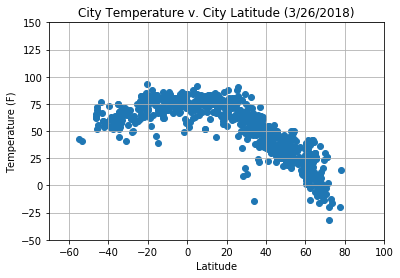

In [104]:
#Build a scatter plot
plt.scatter(cities_DF["Latitude"],
            cities_DF["Temperature (F)"])
#Label Heading
plt.title("City Temperature v. City Latitude (3/26/2018)")
#Axes labels and limits
plt.ylabel("Temperature (F)")
plt.ylim(-50, 150)
plt.xlabel("Latitude")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("TemperaturevLatitude.png")
plt.show()

## 2 Humidity (%) v. Latitude

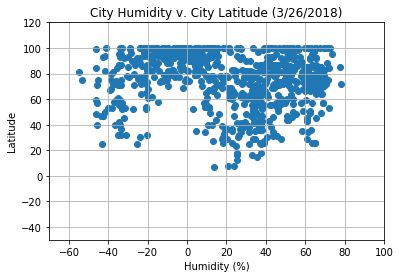

In [105]:
#Build a scatter plot
plt.scatter(cities_DF["Latitude"],
            cities_DF["Humidity (%)"])
#Label Heading
plt.title("City Humidity v. City Latitude (3/26/2018)")
#Axes labels and limits
plt.ylabel("Latitude")
plt.ylim(-50, 120)
plt.xlabel("Humidity (%)")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("HumidityvLatitude.png")
plt.show()

## 3 Cloudiness (%) v. Latitude

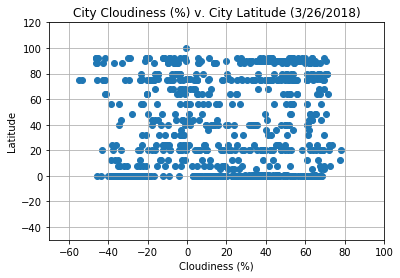

In [106]:
#Build a scatter plot
plt.scatter(cities_DF["Latitude"],
            cities_DF["Cloudiness (%)"])
#Label Heading
plt.title("City Cloudiness (%) v. City Latitude (3/26/2018)")
#Axes labels and limits
plt.ylabel("Latitude")
plt.ylim(-50, 120)
plt.xlabel("Cloudiness (%)")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("CloudinessvLatitude.png")
plt.show()

## 4 Wind Speed (mph) v. Latitude

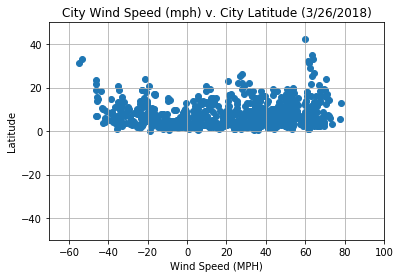

In [107]:
#Build a scatter plot
plt.scatter(cities_DF["Latitude"],
            cities_DF["Wind Speed (mph)"])
#Label Heading
plt.title("City Wind Speed (mph) v. City Latitude (3/26/2018)")
#Axes labels and limits
plt.ylabel("Latitude")
plt.ylim(-50, 50)
plt.xlabel("Wind Speed (MPH)")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("Wind SpeedvLatitude.png")
plt.show()